## 1. Data Understanding and Exploration

In [1]:
#Importing the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
import sklearn.metrics as metrics
import os

# hide warnings
import warnings
warnings.filterwarnings('ignore')

#Setting the columns that can be displayed to max as 500 and rows to 300
pd.set_option('display.max_columns', 500)
pd.options.display.max_rows = 300

In [2]:
# reading the dataset
housing_orig = pd.read_csv(r"C:\Users\Sheetal\Downloads\train (1).csv")
housing_orig

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1999,2000,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,953,953,GasA,Ex,Y,SBrkr,953,694,0,1647,0,0,2,1,3,1,TA,7,Typ,1,TA,Attchd,1999.0,RFn,2,460,TA,TA,Y,0,40,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1978,1988,Gable,CompShg,Plywood,Plywood,Stone,119.0,TA,TA,CBlock,Gd,TA,No,ALQ,790,Rec,163,589,1542,GasA,TA,Y,SBrkr,2073,0,0,2073,1,0,2,0,3,1,TA,7,Min1,2,TA,Attchd,1978.0,Unf,2,500,TA,TA,Y,349,0,0,0,0,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,9,1941,2006,Gable,CompShg,CemntBd,CmentBd,None,0.0,Ex,Gd,Stone,TA,Gd,No,GLQ,275,Unf,0,877,1152,GasA,Ex,Y,SBrkr,1188,1152,0,2340,0,0,2,0,4,1,Gd,9,Typ,2,Gd,Attchd,1941.0,RFn,1,252,TA,TA,Y,0,60,0,0,0,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,6,1950,1996,Hip,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,TA,TA,Mn,GLQ,49,Rec,1029,0,1078,Gas

In [3]:
#Creating a copy of the data set to to work on
housing = housing_orig.copy(deep= True)

In [4]:
#to have the look at the data
housing.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
#Statistical description of the dataset
housing.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [6]:
#To understand the columns, shape and data types of various columns
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [7]:
#To understand the shape 
housing.shape

(1460, 81)

## 2. Data Cleaning

### Creating derived features
Converting dates (YearBuilt, YearRemodAdd, GarageYrBlt) to days (DiffYearBuilt, DiffYearRemodAdd, DiffGarageYrBlt) from today

In [8]:
import datetime as d
current_year = int(d.datetime.now().year)

#Caluculating the number of years the house was sold from the current year
housing['YrSold'] = current_year-housing['YrSold']

#Caluculating the number of years the house was built from the current year
housing['YearBuilt'] = current_year-housing['YearBuilt']

#Caluculating the number of years the house was built from the current year
housing['YearRemodAdd'] = current_year-housing['YearRemodAdd']

#Caluculating the age of the garage based on the year it was built
housing['GarageYrBlt'] = current_year-housing['GarageYrBlt']

### Dealing with Missing Values

In [9]:
# Checking the percentage of null values in the dataframe 'housing' again

round(100*(housing.isnull().sum()/len(housing.index)), 2).sort_values(ascending=False)

PoolQC           99.52
MiscFeature      96.30
Alley            93.77
Fence            80.75
FireplaceQu      47.26
LotFrontage      17.74
GarageCond        5.55
GarageType        5.55
GarageYrBlt       5.55
GarageFinish      5.55
GarageQual        5.55
BsmtExposure      2.60
BsmtFinType2      2.60
BsmtFinType1      2.53
BsmtCond          2.53
BsmtQual          2.53
MasVnrArea        0.55
MasVnrType        0.55
Electrical        0.07
Utilities         0.00
YearRemodAdd      0.00
MSSubClass        0.00
Foundation        0.00
ExterCond         0.00
ExterQual         0.00
Exterior2nd       0.00
Exterior1st       0.00
RoofMatl          0.00
RoofStyle         0.00
YearBuilt         0.00
LotConfig         0.00
OverallCond       0.00
OverallQual       0.00
HouseStyle        0.00
BldgType          0.00
Condition2        0.00
BsmtFinSF1        0.00
MSZoning          0.00
LotArea           0.00
Street            0.00
Condition1        0.00
Neighborhood      0.00
LotShape          0.00
LandContour

#### Modifying Misiing values with meaning like no Basement or no garage etc to NA 

In [10]:
# According to the data dictionary provided, the nulls in these columns indicates the absence of facility which may affect the price
# Hence, we will first impute the categorical variables with 'None'
null_with_meaning = [ 'PoolQC', 'MiscFeature', 'Alley', 'Fence',"MasVnrType", "BsmtQual", "BsmtCond", "BsmtExposure", "BsmtFinType1", "BsmtFinType2", "FireplaceQu", "GarageType", "GarageFinish", "GarageQual", "GarageCond"]
for i in null_with_meaning:
    housing[i].fillna("NA", inplace=True)

In [11]:
# Checking the percentage of null values in the dataframe 'housing' again

round(100*(housing.isnull().sum()/len(housing.index)), 2).sort_values(ascending=False)

LotFrontage      17.74
GarageYrBlt       5.55
MasVnrArea        0.55
Electrical        0.07
SalePrice         0.00
ExterCond         0.00
RoofStyle         0.00
RoofMatl          0.00
Exterior1st       0.00
Exterior2nd       0.00
MasVnrType        0.00
ExterQual         0.00
BsmtQual          0.00
Foundation        0.00
BsmtCond          0.00
BsmtExposure      0.00
BsmtFinType1      0.00
BsmtFinSF1        0.00
BsmtFinType2      0.00
BsmtFinSF2        0.00
YearRemodAdd      0.00
YearBuilt         0.00
TotalBsmtSF       0.00
Utilities         0.00
MSSubClass        0.00
MSZoning          0.00
LotArea           0.00
Street            0.00
Alley             0.00
LotShape          0.00
LandContour       0.00
LotConfig         0.00
OverallCond       0.00
LandSlope         0.00
Neighborhood      0.00
Condition1        0.00
Condition2        0.00
BldgType          0.00
HouseStyle        0.00
OverallQual       0.00
BsmtUnfSF         0.00
HeatingQC         0.00
Heating           0.00
ScreenPorch

#### Immutating of Missing Values with optimal solutions

#### LotFrontage

In [12]:
#Checking the values and their distributions of the LotFrontage
housing['LotFrontage'].describe()

count    1201.000000
mean       70.049958
std        24.284752
min        21.000000
25%        59.000000
50%        69.000000
75%        80.000000
max       313.000000
Name: LotFrontage, dtype: float64

count    1201.000000
mean       70.049958
std        24.284752
min        21.000000
25%        59.000000
50%        69.000000
75%        80.000000
max       313.000000
Name: LotFrontage, dtype: float64

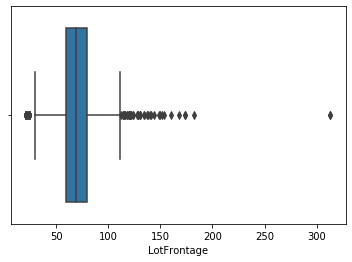

In [13]:
 #To understand if thre are any outliers in the column
sns.boxplot('LotFrontage', data = housing)
housing['LotFrontage'].describe()

As we can see **there are outliers** in the data, so we will impute the missing values using the **median** of the column.

In [14]:
housing['LotFrontage'] = housing['LotFrontage'].fillna(housing['LotFrontage'].median())

#### MasVnrArea

count    1452.000000
mean      103.685262
std       181.066207
min         0.000000
25%         0.000000
50%         0.000000
75%       166.000000
max      1600.000000
Name: MasVnrArea, dtype: float64

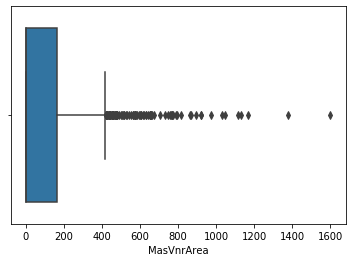

In [15]:
 #To understand if thre are any outliers in the column
sns.boxplot('MasVnrArea', data = housing)
housing['MasVnrArea'].describe()

As **there are outliers** in the column, **median** will be the best immuting technique

In [16]:
housing['MasVnrArea'] = housing['MasVnrArea'].fillna(housing['MasVnrArea'].median())

#### GarageYrBlt

In [17]:
housing['GarageYrBlt'].describe()

count    1379.000000
mean       41.493836
std        24.689725
min        10.000000
25%        18.000000
50%        40.000000
75%        59.000000
max       120.000000
Name: GarageYrBlt, dtype: float64

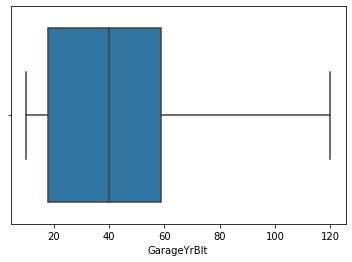

In [18]:
#To understand if thre are any outliers in the column
sns.boxplot('GarageYrBlt', data = housing)

**Mising value for GarageYrBlt might be becuase of genuine missing value or because of absense of garage.So as not to disturb the distribution , I m immute it with median**

In [19]:
housing['GarageYrBlt'] = housing['GarageYrBlt'].fillna(housing['GarageYrBlt'].median())

#### Electrical

In [20]:
housing['Electrical'].value_counts()

SBrkr    1334
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: Electrical, dtype: int64

In [21]:
housing['Electrical'] = housing['Electrical'].fillna(housing['Electrical'].mode())

#### Changing datatype of Features which seems to be categorical but are given numeric datatype

In [22]:
#converting the below columns into a object class as the column has very less unique values 
housing['MSSubClass'] = housing['MSSubClass'].astype(object)
housing['BsmtHalfBath'] = housing['BsmtHalfBath'].astype(object)
housing['KitchenAbvGr'] = housing['KitchenAbvGr'].astype(object)
housing['OverallQual'] = housing['OverallQual'].astype(object)
housing['BsmtFullBath'] = housing['BsmtFullBath'].astype(object)
housing['FullBath'] = housing['FullBath'].astype(object)
housing['HalfBath'] = housing['HalfBath'].astype(object)
housing['BedroomAbvGr'] = housing['BedroomAbvGr'].astype(object)
housing['Fireplaces'] = housing['Fireplaces'].astype(object)
housing['GarageCars'] = housing['GarageCars'].astype(object)
housing['OverallCond'] = housing['OverallCond'].astype(object)


In [23]:
housing.drop('Id', axis = 1, inplace = True)
print(housing.shape)

(1460, 80)


### Removing the skewed columns

logic: if value_counts() of any value of a column is greater than 90% then it is considered as skewed column and thus dropped from the dataset

Have checked the Percentage variance for the columns, written the how much % of the values are same so will be dropping the columns identified respectively

In [24]:
col_dropped=[]
def skewness(data):
    for cols in data:
         col_distribution=((data[cols].value_counts(normalize=True))*100).to_dict()
         skew_col=list(map(lambda x:x>=90,col_distribution.values()))
         print('lets analyse {}'.format(cols))
         print((data[cols].value_counts(normalize=True))*100)
         if skew_col.count(True)>0:
            print('{} is highly skewed thus dropping the column'.format(cols))
            col_dropped.append(cols)
         elif skew_col.count(True)==0:
            print('{} is not skewed so keeping it '.format(cols))
skewness(housing) 


lets analyse MSSubClass
20     36.712329
60     20.479452
50      9.863014
120     5.958904
30      4.726027
160     4.315068
70      4.109589
80      3.972603
90      3.561644
190     2.054795
85      1.369863
75      1.095890
45      0.821918
180     0.684932
40      0.273973
Name: MSSubClass, dtype: float64
MSSubClass is not skewed so keeping it 
lets analyse MSZoning
RL         78.835616
RM         14.931507
FV          4.452055
RH          1.095890
C (all)     0.684932
Name: MSZoning, dtype: float64
MSZoning is not skewed so keeping it 
lets analyse LotFrontage
69.0     18.493151
60.0      9.794521
70.0      4.794521
80.0      4.726027
50.0      3.904110
75.0      3.630137
65.0      3.013699
85.0      2.739726
78.0      1.712329
90.0      1.575342
21.0      1.575342
68.0      1.301370
24.0      1.301370
64.0      1.301370
73.0      1.232877
63.0      1.164384
55.0      1.164384
79.0      1.164384
72.0      1.164384
100.0     1.095890
74.0      1.027397
66.0      1.027397
51.0     

lets analyse MasVnrArea
0.0      59.520548
72.0      0.547945
180.0     0.547945
108.0     0.547945
120.0     0.479452
           ...    
651.0     0.068493
337.0     0.068493
415.0     0.068493
293.0     0.068493
621.0     0.068493
Name: MasVnrArea, Length: 327, dtype: float64
MasVnrArea is not skewed so keeping it 
lets analyse ExterQual
TA    62.054795
Gd    33.424658
Ex     3.561644
Fa     0.958904
Name: ExterQual, dtype: float64
ExterQual is not skewed so keeping it 
lets analyse ExterCond
TA    87.808219
Gd    10.000000
Fa     1.917808
Ex     0.205479
Po     0.068493
Name: ExterCond, dtype: float64
ExterCond is not skewed so keeping it 
lets analyse Foundation
PConc     44.315068
CBlock    43.424658
BrkTil    10.000000
Slab       1.643836
Stone      0.410959
Wood       0.205479
Name: Foundation, dtype: float64
Foundation is not skewed so keeping it 
lets analyse BsmtQual
TA    44.452055
Gd    42.328767
Ex     8.287671
NA     2.534247
Fa     2.397260
Name: BsmtQual, dtype: float64

lets analyse TotRmsAbvGrd
6     27.534247
7     22.534247
5     18.835616
8     12.808219
4      6.643836
9      5.136986
10     3.219178
11     1.232877
3      1.164384
12     0.753425
14     0.068493
2      0.068493
Name: TotRmsAbvGrd, dtype: float64
TotRmsAbvGrd is not skewed so keeping it 
lets analyse Functional
Typ     93.150685
Min2     2.328767
Min1     2.123288
Mod      1.027397
Maj1     0.958904
Maj2     0.342466
Sev      0.068493
Name: Functional, dtype: float64
Functional is highly skewed thus dropping the column
lets analyse Fireplaces
0    47.260274
1    44.520548
2     7.876712
3     0.342466
Name: Fireplaces, dtype: float64
Fireplaces is not skewed so keeping it 
lets analyse FireplaceQu
NA    47.260274
Gd    26.027397
TA    21.438356
Fa     2.260274
Ex     1.643836
Po     1.369863
Name: FireplaceQu, dtype: float64
FireplaceQu is not skewed so keeping it 
lets analyse GarageType
Attchd     59.589041
Detchd     26.506849
BuiltIn     6.027397
NA          5.547945
Basment 

Name: OpenPorchSF, dtype: float64
OpenPorchSF is not skewed so keeping it 
lets analyse EnclosedPorch
0      85.753425
112     1.027397
96      0.410959
120     0.342466
144     0.342466
192     0.342466
216     0.342466
252     0.273973
116     0.273973
156     0.273973
126     0.205479
228     0.205479
128     0.205479
184     0.205479
102     0.205479
150     0.205479
40      0.205479
176     0.205479
164     0.205479
77      0.136986
185     0.136986
80      0.136986
180     0.136986
84      0.136986
160     0.136986
168     0.136986
205     0.136986
158     0.136986
154     0.136986
100     0.136986
108     0.136986
137     0.136986
114     0.136986
115     0.136986
202     0.136986
190     0.136986
234     0.136986
244     0.136986
36      0.136986
240     0.136986
34      0.136986
39      0.136986
224     0.136986
32      0.136986
264     0.136986
236     0.136986
30      0.068493
105     0.068493
94      0.068493
24      0.068493
99      0.068493
98      0.068493
318     0.0684

In [25]:
print('Number of cols to be dropped due to skewness {}'.format(len(col_dropped)))
print(col_dropped)
housing.shape


Number of cols to be dropped due to skewness 21
['Street', 'Alley', 'Utilities', 'LandSlope', 'Condition2', 'RoofMatl', 'Heating', 'CentralAir', 'Electrical', 'LowQualFinSF', 'BsmtHalfBath', 'KitchenAbvGr', 'Functional', 'GarageCond', 'PavedDrive', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'PoolQC', 'MiscFeature', 'MiscVal']


(1460, 80)

In [26]:
housing.drop(['Street', 'Alley', 'Utilities', 'LandSlope', 'Condition2', 'RoofMatl', 'Heating', 'CentralAir', 'Electrical', 'LowQualFinSF', 'BsmtHalfBath', 'KitchenAbvGr', 'Functional', 'GarageCond', 'PavedDrive', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'PoolQC', 'MiscFeature', 'MiscVal'], axis = 1,inplace = True)

In [27]:
housing.shape

(1460, 59)

### Outlier Treatment

In [28]:
# Subset all categorical variables
categorical_var=housing.select_dtypes(include=['object'])
categorical_var.columns

# Subset all continuous variables
numerical_var=housing.loc[:, ~housing.columns.isin(categorical_var.columns)]
numerical_var=numerical_var.drop(['SalePrice'],axis=1)

cols=list(numerical_var.columns)

#### Making boxplot for all variables to detect outliers

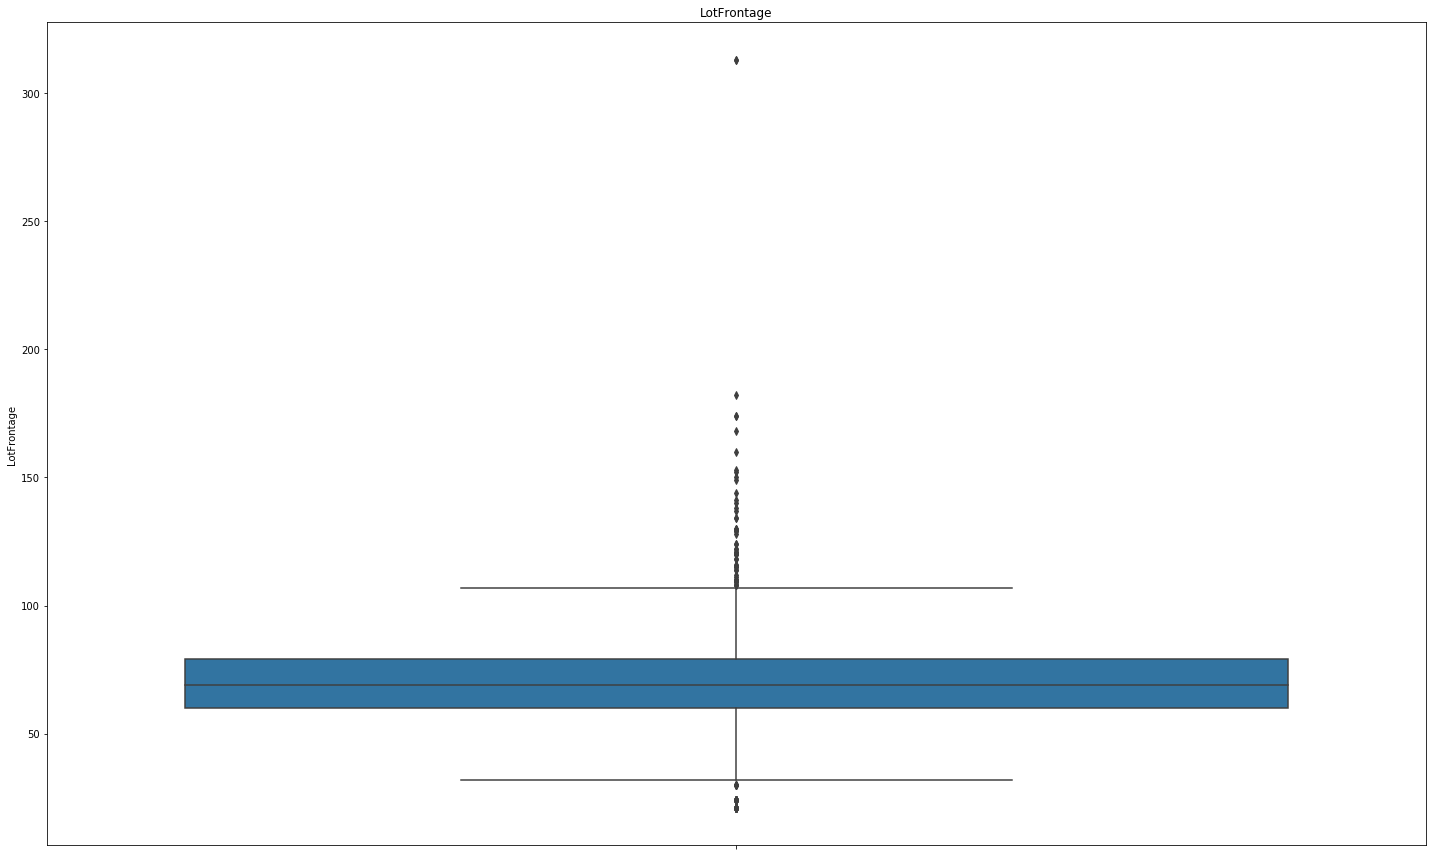

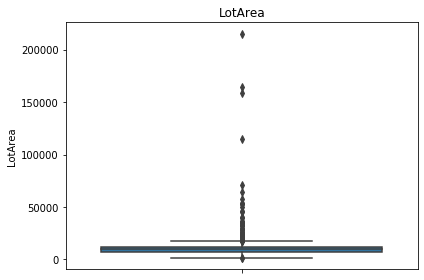

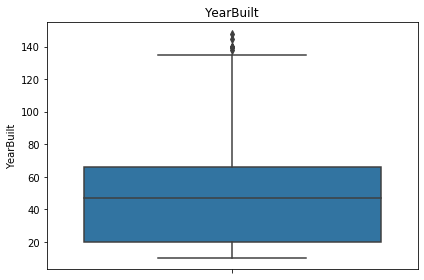

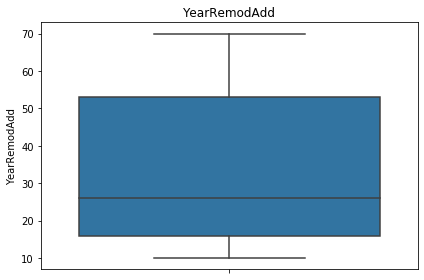

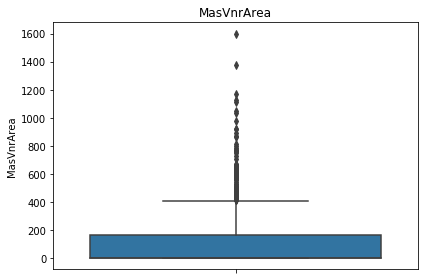

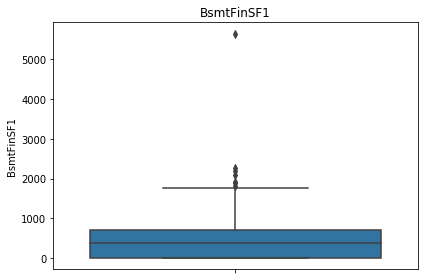

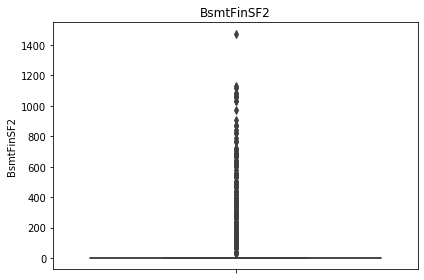

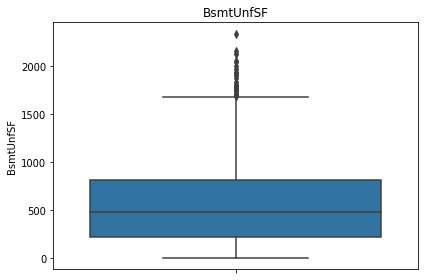

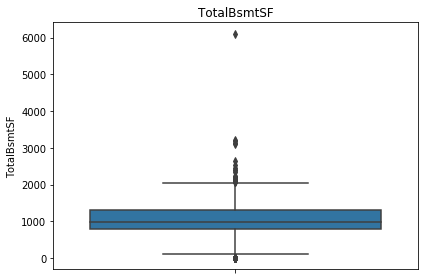

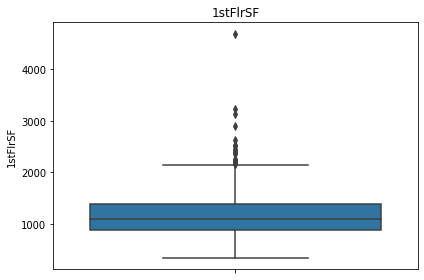

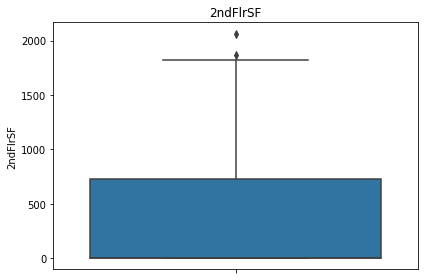

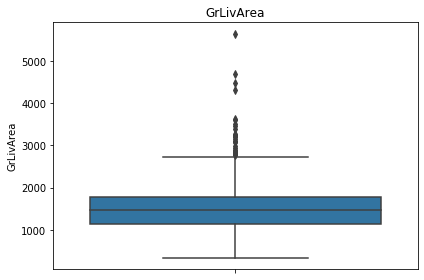

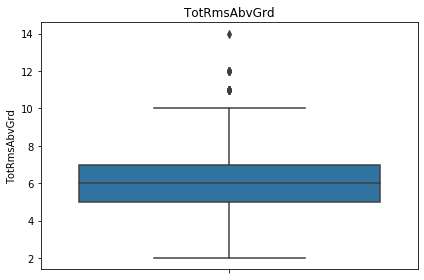

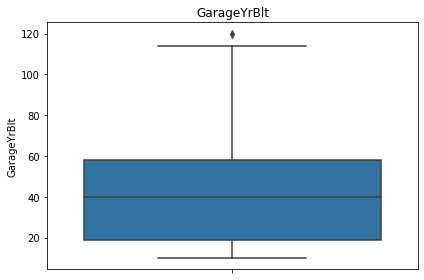

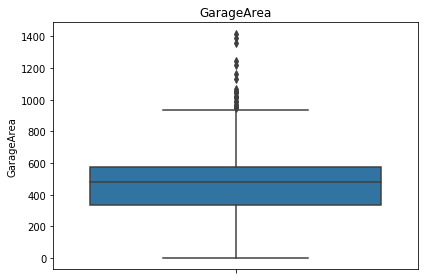

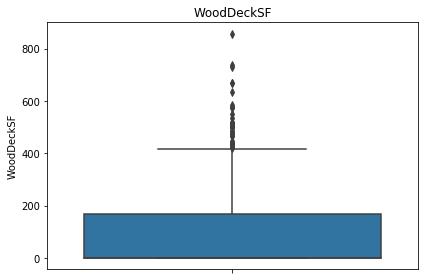

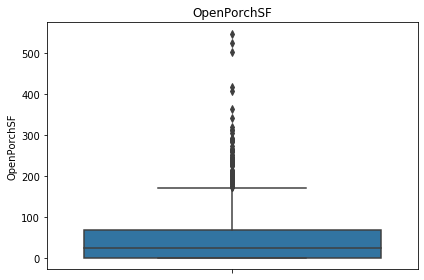

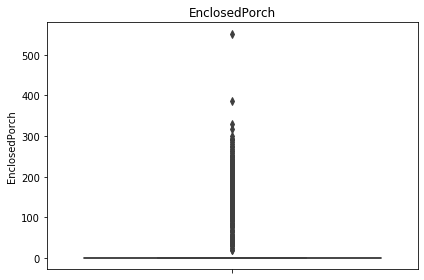

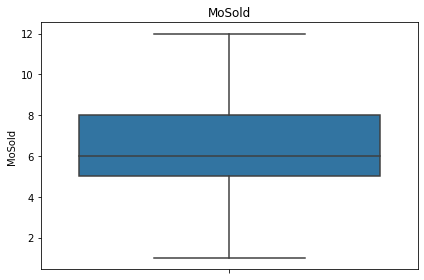

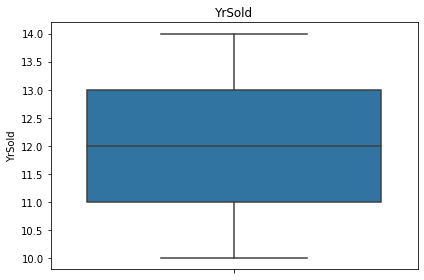

In [29]:
#Function to plot the distribution plot of the numeric variable list
plt.figure(figsize=(20, 12))
for i in cols:
    plt.title(i)
    sns.boxplot(y=i,data=housing)
    plt.tight_layout()
    plt.show()
   

In [30]:
def remove_outlier(df_in, col_name):
        q1 = df_in[col_name].quantile(0.25)
        q3 = df_in[col_name].quantile(0.75)
        iqr = q3-q1 #Interquartile range
        fence_low  = q1-1.5*iqr
        fence_high = q3+1.5*iqr
        df_out = df_in.loc[(df_in[col_name] > fence_low) & (df_in[col_name] < fence_high)]
        return df_out

# Using the above function for below columns where we need to do outlier treatment  :

housing = remove_outlier(housing,'LotFrontage')
housing = remove_outlier(housing,'LotArea')
housing = remove_outlier(housing,'MasVnrArea')
housing = remove_outlier(housing,'BsmtFinSF1')
housing = remove_outlier(housing,'BsmtUnfSF')
housing = remove_outlier(housing,'TotalBsmtSF')
housing = remove_outlier(housing,'1stFlrSF')
housing = remove_outlier(housing,'2ndFlrSF')
housing = remove_outlier(housing,'GrLivArea')
housing = remove_outlier(housing,'GarageArea')
housing = remove_outlier(housing,'WoodDeckSF')
housing = remove_outlier(housing,'OpenPorchSF')

# We left these columns 'BsmtFinSF2','LowQualFinSF','EnclosedPorch','3SsnPorch', 'ScreenPorch','PoolArea','MiscVal' 
# which seems to have outlier but actually that is expected and required behaviour. 

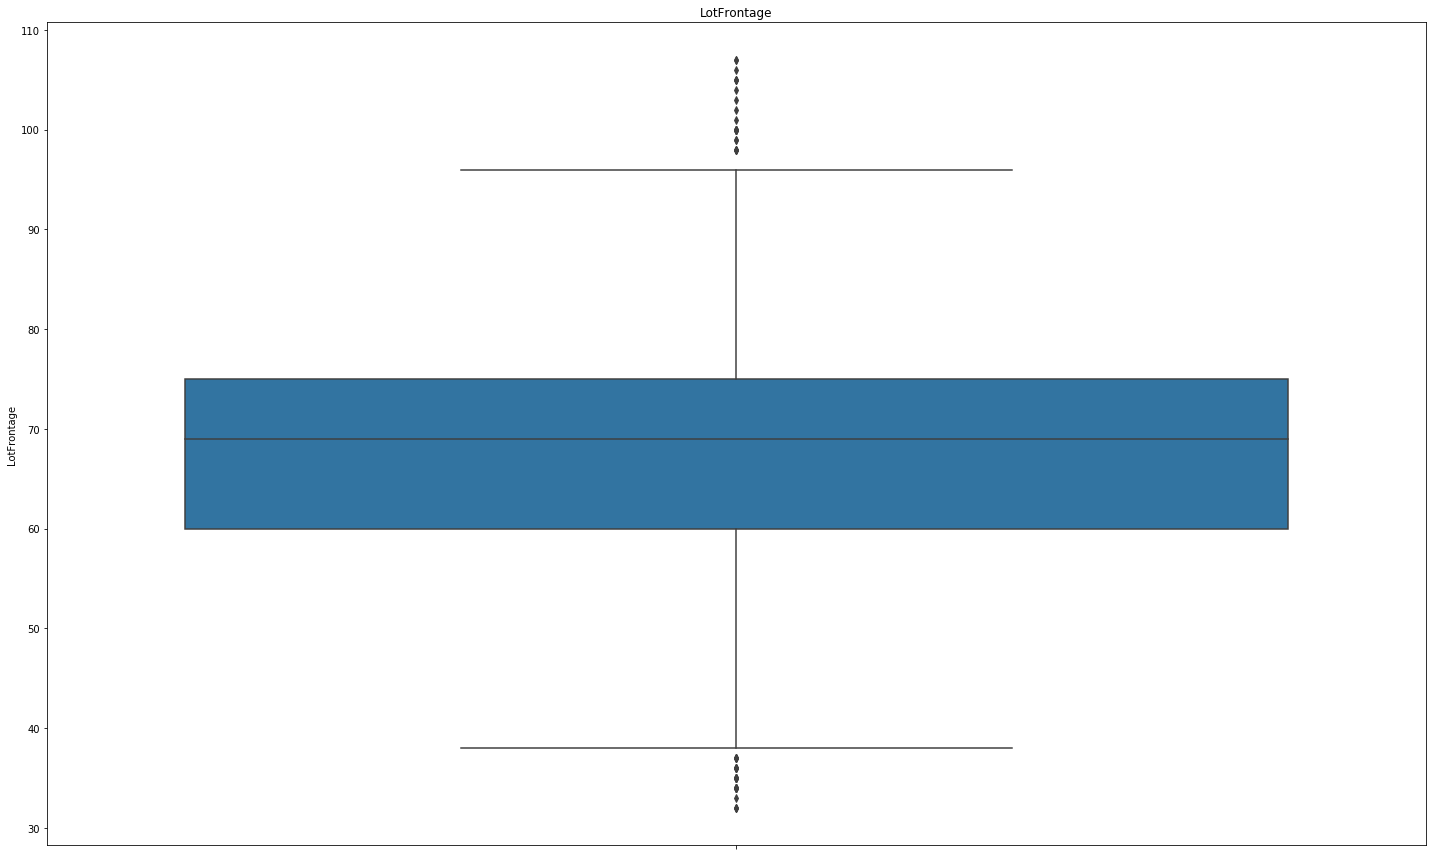

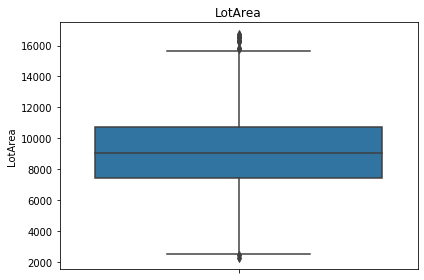

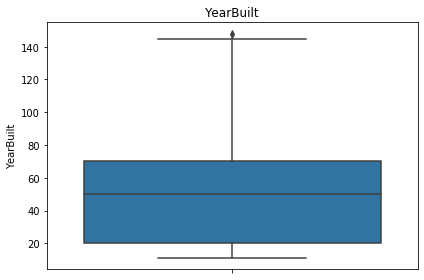

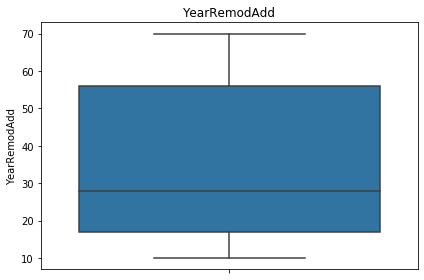

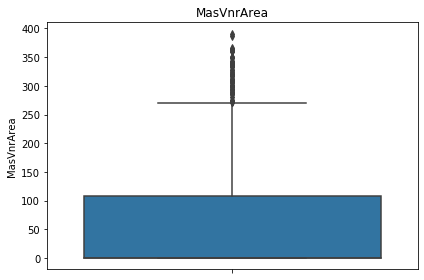

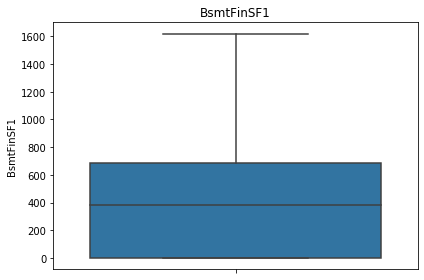

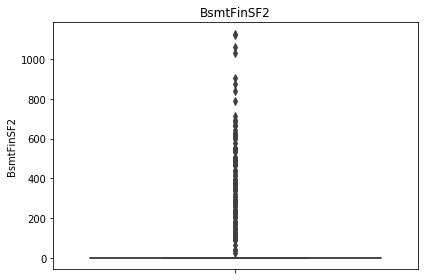

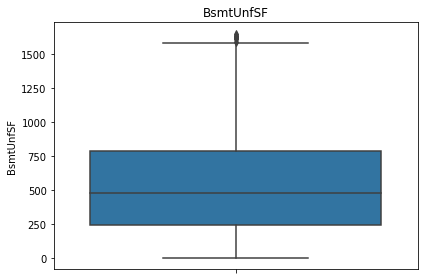

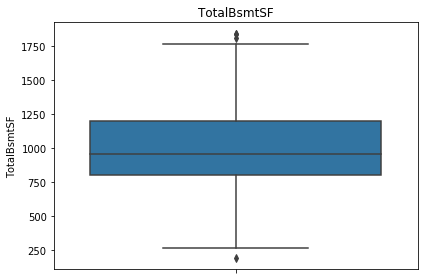

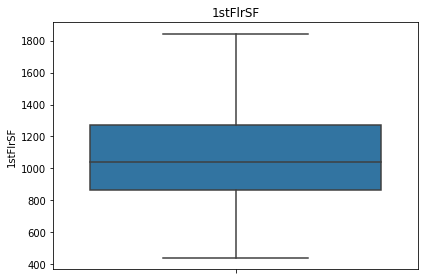

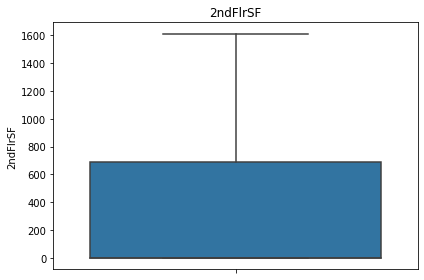

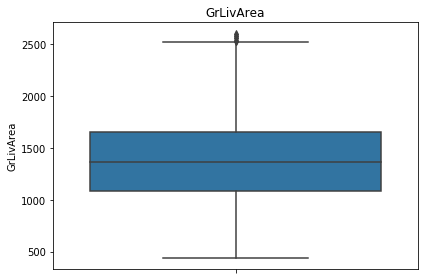

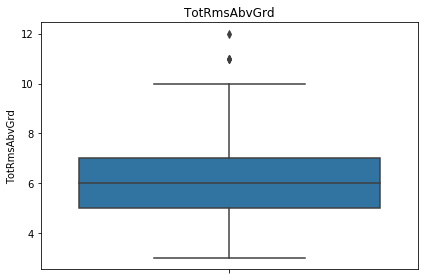

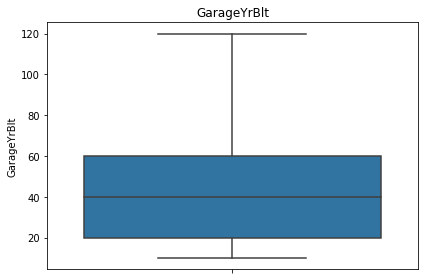

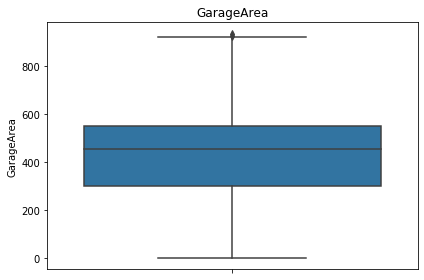

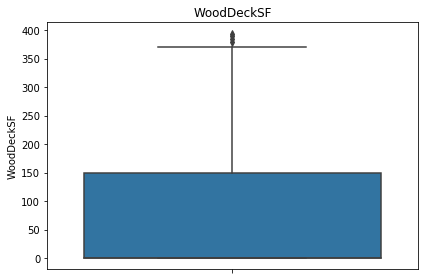

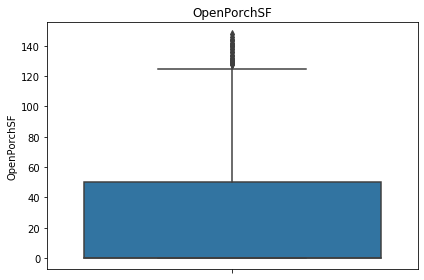

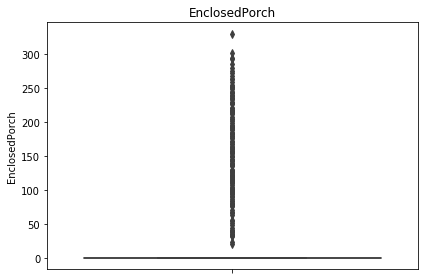

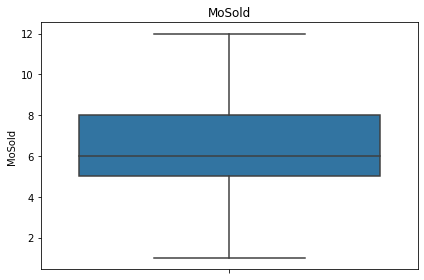

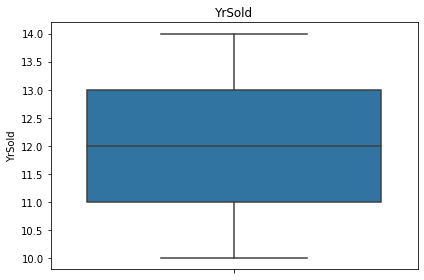

In [31]:
#Function to plot the distribution plot of the numeric variable list
plt.figure(figsize=(20, 12))
for i in cols:
    plt.title(i)
    sns.boxplot(y=i,data=housing)
    plt.tight_layout()
    plt.show()

### Transformation on Target Feature

As we know , we can use Linear Regression if and only if it follows all the Assumption. One of the assumption being , the distribution of target variable should normally distributed.

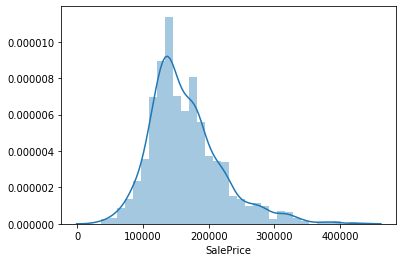

In [32]:
#To see if the 'SalePrice' column is normally distributed to apply regression on it
sns.distplot(housing['SalePrice'])

**As we can see some skewness , it is not normally distributed. So we need to transform our feature.**

In [33]:
#Applying the log transformation technique on the SalePrice column to convert into a normal distributed data
housing['SalePrice'] = np.log(housing['SalePrice'])

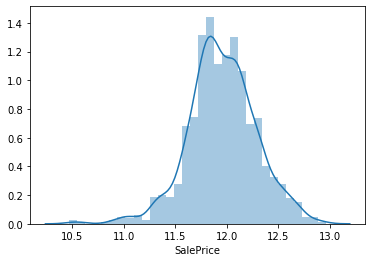

In [34]:
sns.distplot(housing['SalePrice'])

In [35]:
housing['SalePrice']

0       12.247694
1       12.109011
2       12.317167
3       11.849398
4       12.429216
          ...    
1452    11.884489
1454    12.128111
1455    12.072541
1457    12.493130
1458    11.864462
Name: SalePrice, Length: 1015, dtype: float64

## 3. Data Vizualization


 Lets visualize Categorical Variables wrt Target Variables

#### Relationship of MSZoning and SaleCondition with Sales Price

(array([0, 1, 2, 3, 4]), <a list of 5 Text xticklabel objects>)

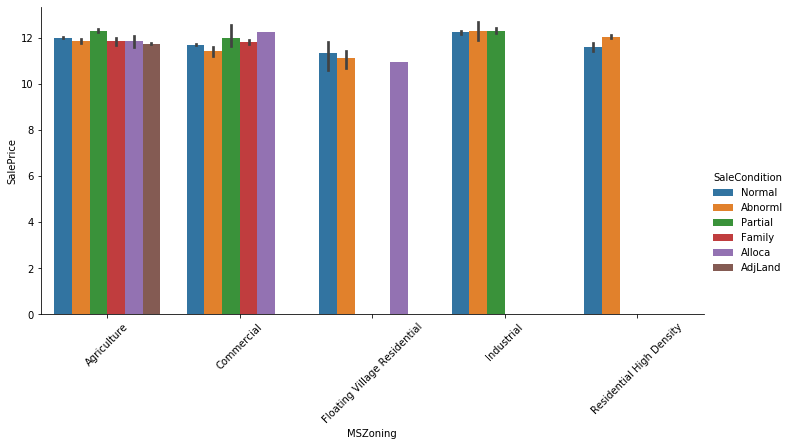

In [36]:
g=sns.catplot(x = 'MSZoning', y = 'SalePrice', data = housing ,hue = 'SaleCondition', kind='bar',height=5, aspect=2)
g.set(xticklabels=['Agriculture','Commercial','Floating Village Residential','Industrial','Residential High Density','Residential Low Density',
                  'Residential Low Density Park','Residential Medium Density'])
plt.xticks(rotation=45)
   

As we can see Sales Price of almost all MSZoning are same except for Floating Viallage Residence being least. Family buying housing mostly in Agricultural and Commercial Area .

#### Relationship of Lotshape and OVerallQuality with Sales Price

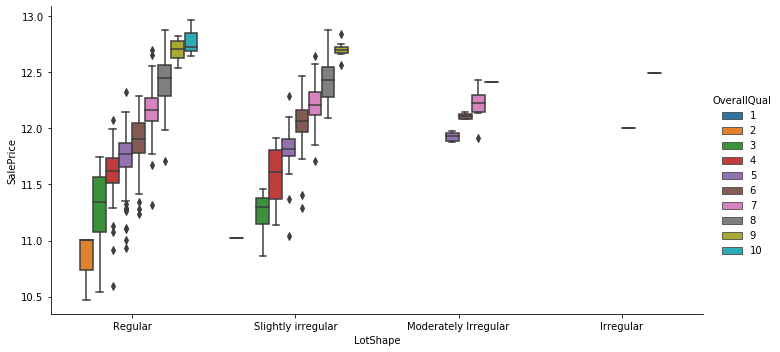

In [37]:
g=sns.catplot(x = 'LotShape', y = 'SalePrice', hue = 'OverallQual', data = housing , kind='box',height=5, aspect=2)
g.set(xticklabels=['Regular','Slightly irregular','Moderately Irregular','Irregular'])

We can see see mostly people are buying in Regular Lotshape  and irregular being least prefered. And saleprice incraeses as the overall quality rate=ing increases.

#### Relationship of BldgType and RoofStyle with Sales Price

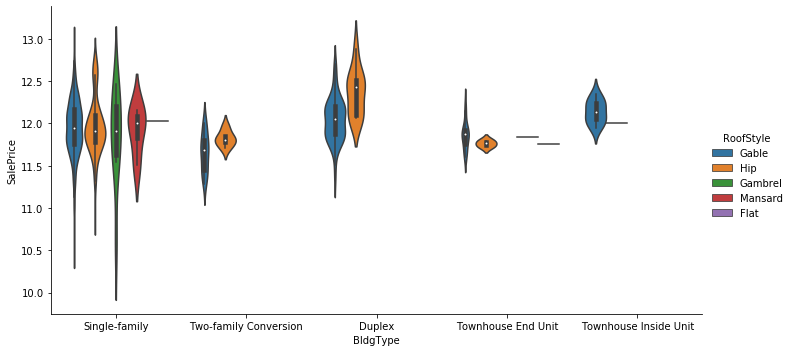

In [38]:
g=sns.catplot(x = 'BldgType', y = 'SalePrice', hue = 'RoofStyle', data = housing,kind='violin',height=5, aspect=2)
g.set(xticklabels=['Single-family','Two-family Conversion','Duplex','Townhouse End Unit','Townhouse Inside Unit'])


We can see, single family are most popular and Township end unit being least. And Gable being most popular among all building type.

#### Relationship of GarageType and Foundation with Sales Price

<Figure size 720x720 with 0 Axes>

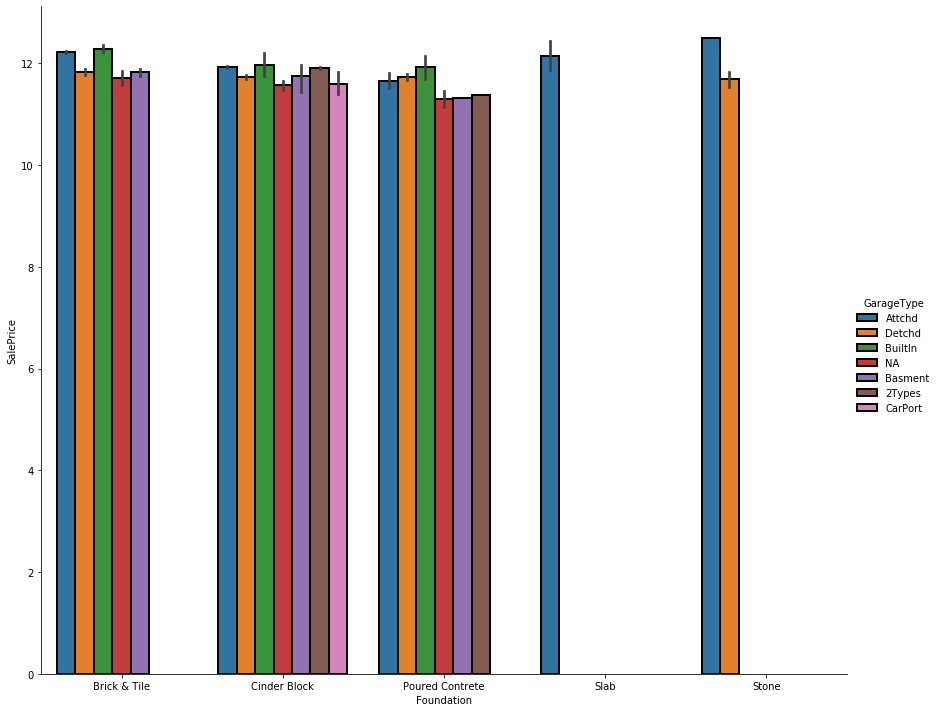

In [39]:
plt.figure(figsize = (10, 10))
g=sns.catplot(x="Foundation", y="SalePrice",
               hue="GarageType",
                data=housing, kind="bar",edgecolor=(0,0,0),
                  linewidth=2, height=10, aspect=1.2)
g.set(xticklabels=['Brick & Tile','Cinder Block','Poured Contrete','Slab','Stone','Wood'])



We can see Attached garage being most popular. Sale Price for most of the the foundation is almost same.

#### Lets visualize Numerical Variables wrt Target Variables

Text(0.5, 1.0, 'EnclosedPorch - Price scatter plot')

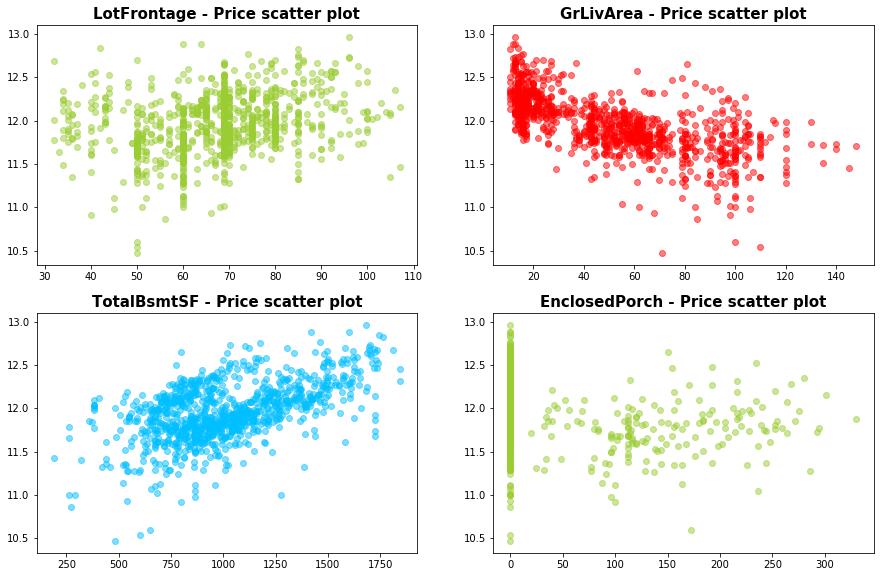

In [40]:
fig = plt.figure(figsize=(15,15))
ax1 = plt.subplot2grid((3,2),(0,0))
plt.scatter(x=housing['LotFrontage'], y=housing['SalePrice'], color=('yellowgreen'), alpha=0.5)
plt.title('LotFrontage - Price scatter plot', fontsize=15, weight='bold' )

ax1 = plt.subplot2grid((3,2),(0,1))
plt.scatter(x=housing['YearBuilt'], y=housing['SalePrice'], color=('red'),alpha=0.5)
plt.title('GrLivArea - Price scatter plot', fontsize=15, weight='bold' )

ax1 = plt.subplot2grid((3,2),(1,0))
plt.scatter(x=housing['TotalBsmtSF'], y=housing['SalePrice'], color=('deepskyblue'),alpha=0.5)
plt.title('TotalBsmtSF - Price scatter plot', fontsize=15, weight='bold' )

ax1 = plt.subplot2grid((3,2),(1,1))
plt.scatter(x=housing['EnclosedPorch'], y=housing['SalePrice'], color=('yellowgreen'),alpha=0.5)
plt.title('EnclosedPorch - Price scatter plot', fontsize=15, weight='bold' )


#### Correlation between Numerical Variables

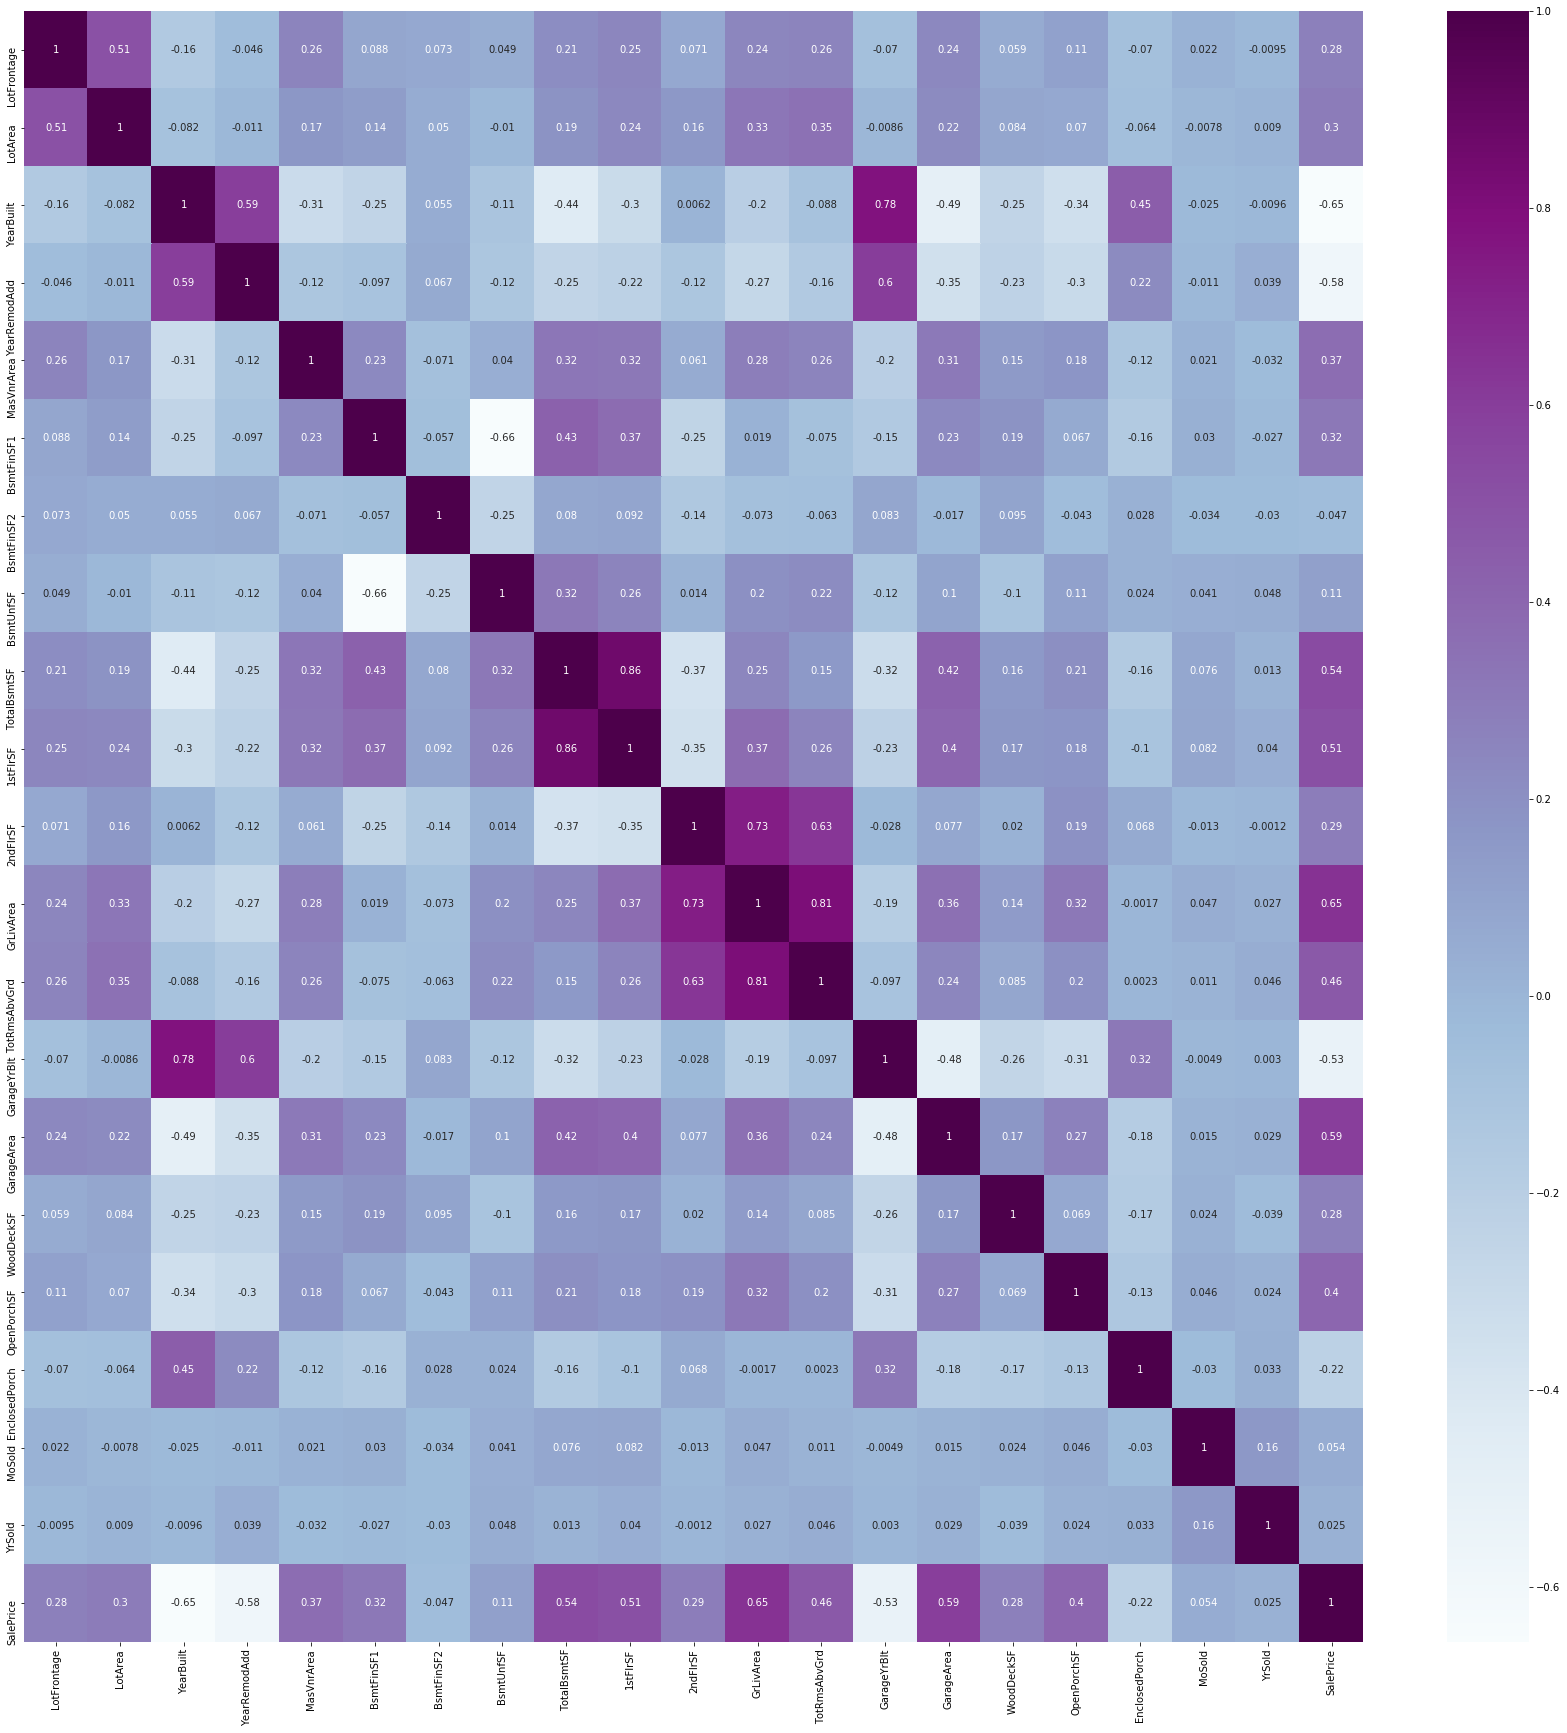

In [41]:
# heatmap
plt.figure(figsize = (30, 30))
sns.heatmap(housing.corr(), annot = True, cmap="BuPu")

Let's now make a correlation/ heat map and observe linear relationships.

1. Positive Correlated variable are, i.e with the increase in these variable , sales price is also getting increased:
    OverallQual
    MasVnrArea
    TotalBsmtSF
    1stFlrSF
    GrLivArea
    FullBath
    TotRmsAbvGrd
    GarageCars
    GarageArea
2. Negative correlated variables are, i.e with the increase in these variable , sales price is getting decreased:
    YearBuilt
    YearRemodAdd

## 4. Data Preparation

In [42]:
# Subset all categorical variables
categorical_var=housing.select_dtypes(include=['object'])
categorical_var.columns

# Subset all continuous variables
numerical_var=housing.loc[:, ~housing.columns.isin(categorical_var.columns)]
#numerical_var=numerical_var.drop(['SalePrice'],axis=1)


### Convert categorical variables into dummies

In [43]:
df = pd.get_dummies(housing, drop_first=True)
df.columns

Index(['LotFrontage', 'LotArea', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea',
       'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF',
       ...
       'SaleType_ConLI', 'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth',
       'SaleType_WD', 'SaleCondition_AdjLand', 'SaleCondition_Alloca',
       'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=238)

### Splitting the Data into Target and Features

In [44]:
y=df.pop('SalePrice')
X=df

In [45]:
X.head()

,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,TotRmsAbvGrd,GarageYrBlt,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,MoSold,YrSold,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,OverallQual_2,OverallQual_3,OverallQual_4,OverallQual_5,OverallQual_6,OverallQual_7,OverallQual_8,OverallQual_9,OverallQual_10,OverallCond_2,OverallCond_3,OverallCond_4,OverallCond_5,OverallCond_6,OverallCond_7,OverallCond_8,OverallCond_9,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_NA,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_TA,BsmtCond_Gd,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_NA,BsmtExposure_No,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_Rec,BsmtFinType2_Unf,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,BsmtFullBath_1,BsmtFullBath_2,BsmtFullBath_3,FullBath_1,FullBath_2,FullBath_3,HalfBath_1,HalfBath_2,BedroomAbvGr_1,BedroomAbvGr_2,BedroomAbvGr_3,BedroomAbvGr_4,BedroomAbvGr_5,BedroomAbvGr_6,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Fireplaces_1,Fireplaces_2,Fireplaces_3,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_NA,FireplaceQu_Po,FireplaceQu_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_NA,GarageFinish_NA,GarageFinish_RFn,GarageFinish_Unf,GarageCars_1,GarageCars_2,GarageCars_3,GarageCars_4,GarageQual_Fa,GarageQual_Gd,GarageQual_NA,GarageQual_Po,GarageQual_TA,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Fence_NA,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,65.0,8450,17,17,196.0,706,0,150,856,856,854,1710,8,17.0,548,0,61,0,2,12,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0

### Scaling the features

In [46]:
# scaling the features
from sklearn.preprocessing import scale

# storing column names in cols, since column names are (annoyingly) lost after 
# scaling (the df is converted to a numpy array)
cols = X.columns
X = pd.DataFrame(scale(X))
y=pd.DataFrame(scale(y))
X.columns = cols
X.columns

Index(['LotFrontage', 'LotArea', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea',
       'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF',
       ...
       'SaleType_ConLI', 'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth',
       'SaleType_WD', 'SaleCondition_AdjLand', 'SaleCondition_Alloca',
       'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=237)

### Splitting the Data into test and training set 

In [47]:

# split into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    train_size=0.7,
                                                    test_size = 0.3, random_state=100)



## 5. Model Building and Evaluation

### Recursive feature elimination

In [48]:
# Running RFE with the output number of the variable equal to 50
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 50)            
rfe = rfe.fit(X_train, y_train)

In [49]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('LotFrontage', False, 116),
 ('LotArea', False, 4),
 ('YearBuilt', True, 1),
 ('YearRemodAdd', False, 12),
 ('MasVnrArea', False, 175),
 ('BsmtFinSF1', True, 1),
 ('BsmtFinSF2', True, 1),
 ('BsmtUnfSF', True, 1),
 ('TotalBsmtSF', True, 1),
 ('1stFlrSF', False, 94),
 ('2ndFlrSF', True, 1),
 ('GrLivArea', True, 1),
 ('TotRmsAbvGrd', False, 97),
 ('GarageYrBlt', False, 36),
 ('GarageArea', False, 25),
 ('WoodDeckSF', False, 126),
 ('OpenPorchSF', False, 183),
 ('EnclosedPorch', False, 92),
 ('MoSold', False, 152),
 ('YrSold', False, 137),
 ('MSSubClass_30', False, 48),
 ('MSSubClass_40', False, 117),
 ('MSSubClass_45', False, 72),
 ('MSSubClass_50', False, 46),
 ('MSSubClass_60', True, 1),
 ('MSSubClass_70', False, 44),
 ('MSSubClass_75', False, 69),
 ('MSSubClass_80', False, 2),
 ('MSSubClass_85', False, 71),
 ('MSSubClass_90', True, 1),
 ('MSSubClass_120', False, 74),
 ('MSSubClass_160', True, 1),
 ('MSSubClass_180', False, 73),
 ('MSSubClass_190', False, 157),
 ('MSZoning_FV', False,

In [50]:
# Columns supported by RFE
col = X_train.columns[rfe.support_]
col

Index(['YearBuilt', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       '2ndFlrSF', 'GrLivArea', 'MSSubClass_60', 'MSSubClass_90',
       'MSSubClass_160', 'Neighborhood_Crawfor', 'BldgType_Duplex',
       'HouseStyle_2Story', 'HouseStyle_SLvl', 'OverallQual_2',
       'OverallQual_3', 'OverallQual_4', 'OverallQual_5', 'OverallQual_6',
       'OverallQual_7', 'OverallQual_8', 'OverallQual_9', 'OverallQual_10',
       'OverallCond_2', 'OverallCond_3', 'OverallCond_4', 'OverallCond_5',
       'OverallCond_6', 'OverallCond_7', 'OverallCond_8', 'OverallCond_9',
       'Exterior1st_BrkComm', 'Exterior1st_CBlock', 'Exterior1st_CemntBd',
       'Exterior2nd_Brk Cmn', 'Exterior2nd_CmentBd', 'BsmtExposure_NA',
       'KitchenQual_Fa', 'KitchenQual_Gd', 'KitchenQual_TA', 'Fireplaces_1',
       'Fireplaces_2', 'FireplaceQu_NA', 'GarageType_NA', 'GarageFinish_NA',
       'GarageCars_1', 'GarageCars_2', 'GarageCars_3', 'GarageCars_4',
       'GarageQual_NA'],
      dtype='object')

In [51]:
# Columns not supported by RFE
X_train.columns[~rfe.support_]

Index(['LotFrontage', 'LotArea', 'YearRemodAdd', 'MasVnrArea', '1stFlrSF',
       'TotRmsAbvGrd', 'GarageYrBlt', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF',
       ...
       'SaleType_ConLI', 'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth',
       'SaleType_WD', 'SaleCondition_AdjLand', 'SaleCondition_Alloca',
       'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=187)

In [52]:
# Creating X_train dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [53]:
X_train_rfe.columns

Index(['YearBuilt', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       '2ndFlrSF', 'GrLivArea', 'MSSubClass_60', 'MSSubClass_90',
       'MSSubClass_160', 'Neighborhood_Crawfor', 'BldgType_Duplex',
       'HouseStyle_2Story', 'HouseStyle_SLvl', 'OverallQual_2',
       'OverallQual_3', 'OverallQual_4', 'OverallQual_5', 'OverallQual_6',
       'OverallQual_7', 'OverallQual_8', 'OverallQual_9', 'OverallQual_10',
       'OverallCond_2', 'OverallCond_3', 'OverallCond_4', 'OverallCond_5',
       'OverallCond_6', 'OverallCond_7', 'OverallCond_8', 'OverallCond_9',
       'Exterior1st_BrkComm', 'Exterior1st_CBlock', 'Exterior1st_CemntBd',
       'Exterior2nd_Brk Cmn', 'Exterior2nd_CmentBd', 'BsmtExposure_NA',
       'KitchenQual_Fa', 'KitchenQual_Gd', 'KitchenQual_TA', 'Fireplaces_1',
       'Fireplaces_2', 'FireplaceQu_NA', 'GarageType_NA', 'GarageFinish_NA',
       'GarageCars_1', 'GarageCars_2', 'GarageCars_3', 'GarageCars_4',
       'GarageQual_NA'],
      dtype='object')

We will be using the rfe supported features for further moelling and prediction 

### Ridge and Lasso Regression

In [54]:
# list of alphas to tune
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}


ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train_rfe, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    7.1s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='neg_mean_absolute_error', verbose=1)

In [55]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results = cv_results[cv_results['param_alpha']<=200]
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.128404,0.226811,0.004000,0.000004,0.0001,{'alpha': 0.0001},-0.212923,-0.260053,-0.242477,-0.264581,-0.205191,-0.237045,0.024140,23,-0.224308,-0.211055,-0.213496,-0.206515,-0.221703,-0.215416,0.006641
1,0.015203,0.001600,0.003999,0.000006,0.001,{'alpha': 0.001},-0.212923,-0.260053,-0.242475,-0.264580,-0.205191,-0.237044,0.024139,22,-0.224308,-0.211056,-0.213497,-0.206515,-0.221704,-0.215416,0.006641
2,0.015206,0.001599,0.006399,0.001961,0.01,{'alpha': 0.01},-0.212925,-0.260052,-0.242463,-0.264570,-0.205191,-0.237040,0.024136,21,-0.224308,-0.211062,-0.213505,-0.206523,-0.221709,-0.215421,0.006639
3,0.013598,0.001961,0.007205,0.001603,0.05,{'alpha': 0.05},-0.212934,-0.260047,-0.242411,-0.264529,-0.205194,-0.237023,0.024121,20,-0.224304,-0.211090,-0.213538,-0.206558,-0.221734,-0.215445,0.006628
4,0.015997,0.002529,0.007999,0.000006,0.1,{'alpha': 0.1},-0.212944,-0.260041,-0.242347,-0.264480,-0.205196,-0.237002,0.024103,19,-0.224300,-0.211123,-0.213579,-0.206600,-0.221764,-0.215473,0.006614


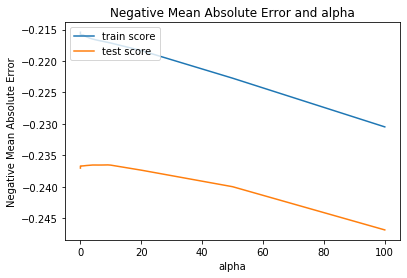

In [56]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

#### Optimal Alpha

In [57]:
print("\n The best estimator across ALL searched params:\n",
          model_cv.best_estimator_)
print("\n The best score across ALL searched params:\n",
          model_cv.best_score_)
print("\n The best parameters across ALL searched params:\n",
          model_cv.best_params_)


 The best estimator across ALL searched params:
 Ridge(alpha=9.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

 The best score across ALL searched params:
 -0.2365352032485731

 The best parameters across ALL searched params:
 {'alpha': 9.0}


In [58]:

#Using the best hyper parameter in the ridge Regression
alpha = 1.0
ridge = Ridge(alpha=alpha)

ridge.fit(X_train_rfe, y_train)
ridge.coef_

array([[-3.91583949e-01,  1.14553887e-01,  2.74869986e-02,
         2.40814175e-03,  1.64808711e-01,  7.04491221e-02,
         2.87919379e-01, -8.04999151e-02, -3.13224917e-02,
        -8.37144482e-02,  8.50221636e-02, -3.13224917e-02,
         1.01527238e-01,  2.91875970e-02, -6.48712148e-03,
        -6.69301037e-03,  5.29906712e-02,  1.16822840e-01,
         1.63037638e-01,  2.41325466e-01,  2.22378756e-01,
         1.09443853e-01,  5.66299048e-02, -1.77801784e-02,
        -1.16578414e-02,  3.74364210e-02,  1.83351927e-01,
         2.11055786e-01,  2.42895091e-01,  1.76117507e-01,
         8.71023773e-02,  3.95681431e-31,  4.24474745e-31,
         6.55592008e-04,  4.24474745e-31,  6.67284272e-04,
         3.56472033e-31, -7.43477758e-02, -1.34665195e-01,
        -1.80665141e-01,  1.69395723e-02,  1.69014729e-02,
        -2.44278574e-02, -1.93160277e-02, -1.93160277e-02,
        -2.26334314e-02,  1.46169943e-02,  2.47567294e-02,
         2.53038118e-02, -1.93160277e-02]])

In [59]:
# predict for the training dataset
y_train_pred = ridge.predict(X_train_rfe)
print('The training accuracy is:')
print(metrics.r2_score(y_true=np.exp(y_train), y_pred=np.exp(y_train_pred)))

The training accuracy is:
0.8352606354709522


In [60]:
X_test=X_test[X_train_rfe.columns]

In [61]:
# predict for the test dataset
y_test_pred = ridge.predict(X_test)
print('The testing accuracy is:')
print(metrics.r2_score(y_true=np.exp(y_test), y_pred=np.exp(y_test_pred)))

The testing accuracy is:
0.8655441198219451


#### The models training and testing accuracy stands at 84% and 86% respectively   which are way nearer and decent enough

#### Top 10 most dominant Features

Taking the absolute value of the coefficient

In [62]:
coefficients = pd.concat([pd.DataFrame(X_train_rfe.columns),pd.DataFrame(np.transpose(abs(ridge.coef_)))],ignore_index=True, axis = 1)
coefficients.columns = ['feature', 'importance']
sorted_df = coefficients.sort_values(by='importance',ascending=False)


In [63]:
sorted_df[0:10]

,feature,importance
0,YearBuilt,0.391584
6,GrLivArea,0.287919
28,OverallCond_7,0.242895
19,OverallQual_7,0.241325
20,OverallQual_8,0.222379
27,OverallCond_6,0.211056
26,OverallCond_5,0.183352
39,KitchenQual_TA,0.180665
29,OverallCond_8,0.176118
4,TotalBsmtSF,0.164809


## Lasso

In [64]:
lasso = Lasso()

# cross validation
lasso_model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

lasso_model_cv.fit(X_train_rfe, y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    6.7s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='neg_mean_absolute_error', verbose=1)

In [65]:
lasso_cv_results = pd.DataFrame(lasso_model_cv.cv_results_)
lasso_cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.208191,0.031068,0.011201,0.002992,0.0001,{'alpha': 0.0001},-0.213494,-0.259889,-0.242134,-0.263792,-0.205113,-0.236884,0.023822,1,-0.224283,-0.211256,-0.213697,-0.206750,-0.221886,-0.215574,0.006568
1,0.122403,0.055807,0.013601,0.007418,0.001,{'alpha': 0.001},-0.214310,-0.261000,-0.240117,-0.265273,-0.204114,-0.236963,0.024419,2,-0.224235,-0.212670,-0.215462,-0.208407,-0.223427,-0.216840,0.006140
2,0.028002,0.006691,0.011998,0.008002,0.01,{'alpha': 0.01},-0.225153,-0.269426,-0.239499,-0.277669,-0.208001,-0.243949,0.026273,3,-0.230899,-0.219100,-0.226357,-0.219289,-0.233446,-0.225818,0.005866
3,0.017601,0.004080,0.007998,0.002532,0.05,{'alpha': 0.05},-0.246247,-0.311356,-0.307806,-0.333254,-0.244898,-0.288712,0.036288,4,-0.277711,-0.265475,-0.271745,-0.260351,-0.275573,-0.270171,0.006434
4,0.015198,0.001604,0.005603,0.001957,0.1,{'alpha': 0.1},-0.292953,-0.343100,-0.366089,-0.376040,-0.272716,-0.330179,0.040614,5,-0.327719,-0.312346,-0.315318,-0.306403,-0.321130,-0.316584,0.007319


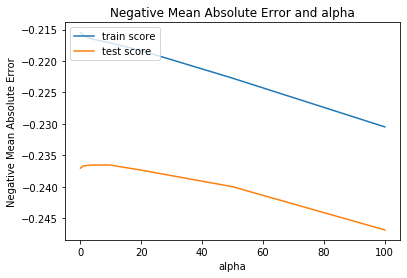

In [66]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = lasso_cv_results['param_alpha'].astype('float32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')

plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

#### Optimal Alpha

In [67]:
print("\n The best estimator across ALL searched params:\n",
          lasso_model_cv.best_estimator_)
print("\n The best score across ALL searched params:\n",
          lasso_model_cv.best_score_)
print("\n The best alpha value across ALL searched params:\n",
          lasso_model_cv.best_params_)


 The best estimator across ALL searched params:
 Lasso(alpha=0.0001, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

 The best score across ALL searched params:
 -0.2368843763073975

 The best alpha value across ALL searched params:
 {'alpha': 0.0001}


In [68]:
alpha_lasso =0.0001

lasso = Lasso(alpha=alpha_lasso)
        
lasso.fit(X_train_rfe, y_train) 

Lasso(alpha=0.0001, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [69]:
lasso.coef_

array([-3.93046512e-01,  1.12287955e-01,  2.65223120e-02, -0.00000000e+00,
        1.64819916e-01,  6.78294669e-02,  2.90522945e-01, -8.05592400e-02,
       -6.26198524e-02, -8.37132039e-02,  8.50524540e-02, -1.08498840e-04,
        1.01403397e-01,  2.87142259e-02, -3.59933361e-03, -0.00000000e+00,
        6.98791145e-02,  1.46558940e-01,  1.91901679e-01,  2.68949406e-01,
        2.40165160e-01,  1.16285081e-01,  6.00310147e-02, -9.76139969e-03,
        3.65772617e-03,  6.15457319e-02,  2.49071382e-01,  2.63400322e-01,
        2.90197017e-01,  2.06886620e-01,  1.02684527e-01,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  8.59029593e-04,
        0.00000000e+00, -7.33207767e-02, -1.36795667e-01, -1.82430069e-01,
        0.00000000e+00,  8.95159885e-03, -4.11443537e-02, -5.89343403e-02,
       -0.00000000e+00, -3.57829266e-02,  0.00000000e+00,  1.68978053e-02,
        2.38345803e-02, -4.28508777e-03])

#### Top 10 most dominant Features

In [70]:
# model coefficients
cols = X.columns
cols = cols.insert(0, "constant")
model_parameters = list(lasso.coef_)
lasso_list = list(zip(cols, model_parameters))

In [71]:
#lasso_list
coefficients = pd.concat([pd.DataFrame(X_train_rfe.columns),pd.DataFrame(np.transpose(abs(lasso.coef_)))],ignore_index=True, axis = 1)
coefficients.columns = ['feature', 'importance']
sorted_df = coefficients.sort_values(by='importance',ascending=False)
sorted_df[0:10]

,feature,importance
0,YearBuilt,0.393047
6,GrLivArea,0.290523
28,OverallCond_7,0.290197
19,OverallQual_7,0.268949
27,OverallCond_6,0.263400
26,OverallCond_5,0.249071
20,OverallQual_8,0.240165
29,OverallCond_8,0.206887
18,OverallQual_6,0.191902
39,KitchenQual_TA,0.182430


In [72]:
#List of all predictors with non zero co-efficients
for i in range(len(lasso_list)):
    if(lasso_list[i][1]!=0):
        print(lasso_list[i][0])

constant
LotFrontage
LotArea
YearRemodAdd
MasVnrArea
BsmtFinSF1
BsmtFinSF2
BsmtUnfSF
TotalBsmtSF
1stFlrSF
2ndFlrSF
GrLivArea
TotRmsAbvGrd
GarageYrBlt
WoodDeckSF
OpenPorchSF
EnclosedPorch
MoSold
YrSold
MSSubClass_30
MSSubClass_40
MSSubClass_45
MSSubClass_50
MSSubClass_60
MSSubClass_70
MSSubClass_75
MSSubClass_80
MSSubClass_85
MSSubClass_90
MSZoning_FV
MSZoning_RL
MSZoning_RM
LotShape_IR2
LotShape_Reg
LandContour_HLS
LandContour_Low
LotConfig_CulDSac
LotConfig_FR3
LotConfig_Inside
Neighborhood_BrkSide


In [73]:
lm = Lasso(alpha=0.001)
lm.fit(X_train_rfe, y_train)

# predict
y_train_pred = lm.predict(X_train_rfe)
print('The training accuracy is:')
print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred))
y_test_pred = lm.predict(X_test)
print('The test accuracy is:')
print(metrics.r2_score(y_true=y_test, y_pred=y_test_pred))

The training accuracy is:
0.8977649568298215
The test accuracy is:
0.8358567423289134


**Model is giving accuracy of   for training and test data respectively**

In [74]:
final_pred_lasso =[]
for i in range(len(lasso_list)):
    if(lasso_list[i][1]!=0):
        final_pred_lasso.append(lasso_list[i][0])
print('Number of predictors selected by optimaloptimal alpha for ridge are:{0}'.format(len(final_pred_lasso)))

Number of predictors selected by optimaloptimal alpha for ridge are:40


In [75]:
X_train_rfe.shape

(710, 50)

**So Lasso omitted 3 features ie shrink their coeffiecient to 0**

As seen in the above cell the train and testing accuracy are in good intervals and which are dencent enough

### Question 1.

#### if you choose double the value of alpha for both ridge and lasso

#### Ridge Regression

Doubling the hyper parameter value for Ridge
Doubling from the optimal value of 1 to 2

In [76]:
alpha_double = 2
ridge_double = Ridge(alpha=alpha_double)

ridge_double.fit(X_train_rfe, y_train)
ridge_double.coef_

array([[-3.89524231e-01,  1.14812190e-01,  2.76030431e-02,
         2.87491899e-03,  1.65798802e-01,  7.17981317e-02,
         2.86059484e-01, -7.91963301e-02, -3.11369324e-02,
        -8.33117929e-02,  8.49747533e-02, -3.11369324e-02,
         1.00947405e-01,  2.95171970e-02, -1.04779378e-02,
        -1.60076176e-02,  2.94363956e-02,  7.57652035e-02,
         1.23330013e-01,  2.03583756e-01,  1.98266846e-01,
         1.00226174e-01,  5.20100509e-02, -2.40515272e-02,
        -2.39042322e-02,  1.82798546e-02,  1.31584380e-01,
         1.69635775e-01,  2.05494066e-01,  1.51760727e-01,
         7.47752875e-02,  1.70876545e-31,  1.83194341e-31,
         9.10894749e-04,  1.83194341e-31,  9.27140252e-04,
         1.53041717e-31, -7.47803317e-02, -1.30941617e-01,
        -1.77308129e-01,  1.70859989e-02,  1.69815035e-02,
        -2.46087622e-02, -1.97321118e-02, -1.97321118e-02,
        -2.27768947e-02,  1.47684638e-02,  2.50912035e-02,
         2.52588401e-02, -1.97321118e-02]])

#### Accuracy after doubling alpha

In [77]:
y_train_pred_double = ridge_double.predict(X_train_rfe)
rsquare_training = metrics.r2_score(y_true=y_train, y_pred=y_train_pred_double)
print(" rsquare for training data : {}".format(rsquare_training))
y_test_pred = ridge_double.predict(X_test)
rsquare_test=metrics.r2_score(y_true=y_test, y_pred=y_test_pred)
print(" rsquare for training data : {}".format(rsquare_test))

 rsquare for training data : 0.8987160471800704
 rsquare for training data : 0.8362448474149093


#### Top 10 Features after doubling alpha in Ridge

In [78]:
coefficients = pd.concat([pd.DataFrame(X_train_rfe.columns),pd.DataFrame(np.transpose(abs(ridge_double.coef_)))],ignore_index=True, axis = 1)
coefficients.columns = ['feature', 'importance']
sorted_df = coefficients.sort_values(by='importance',ascending=False)
sorted_df[0:10]

,feature,importance
0,YearBuilt,0.389524
6,GrLivArea,0.286059
28,OverallCond_7,0.205494
19,OverallQual_7,0.203584
20,OverallQual_8,0.198267
39,KitchenQual_TA,0.177308
27,OverallCond_6,0.169636
4,TotalBsmtSF,0.165799
29,OverallCond_8,0.151761
26,OverallCond_5,0.131584


#### Lasso Regression

Double the Alpha for Lasso
Previously the alpha was 0.001, so now we are taking 0.0002


In [79]:

lm_double = Lasso(alpha=0.0002)
lm_double.fit(X_train_rfe, y_train)

# predict
y_train_pred_double = lm_double.predict(X_train_rfe)
print('The training accuracy is:')
print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred_double))
y_test_pred_double = lm.predict(X_test)
print('The test accuracy is:')
print(metrics.r2_score(y_true=y_test, y_pred=y_test_pred_double))


The training accuracy is:
0.8990314620307589
The test accuracy is:
0.8358567423289134


In [80]:
coefficients = pd.concat([pd.DataFrame(X_train_rfe.columns),pd.DataFrame(np.transpose(abs(lm_double.coef_)))],ignore_index=True, axis = 1)
coefficients.columns = ['feature', 'importance']
sorted_df = coefficients.sort_values(by='importance',ascending=False)
sorted_df[0:10]

,feature,importance
0,YearBuilt,0.392963
6,GrLivArea,0.291187
28,OverallCond_7,0.279098
27,OverallCond_6,0.250966
26,OverallCond_5,0.233398
19,OverallQual_7,0.230659
20,OverallQual_8,0.215669
29,OverallCond_8,0.199610
39,KitchenQual_TA,0.180751
4,TotalBsmtSF,0.164647


### Question 3

#### You will now have to create another model excluding the five most important predictor variables. 

In [81]:
X_train_lasso = X_train_rfe.drop(['OverallCond_7', 'OverallCond_6', 'YearBuilt', 'OverallCond_5', 'OverallQual_7'], axis=1)

In [82]:
X_test_lasso = X_test.drop(['OverallCond_7', 'OverallCond_6', 'YearBuilt', 'OverallCond_5', 'OverallQual_7'], axis=1)

In [83]:
lasso_model_cv.fit(X_train_lasso, y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    3.5s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='neg_mean_absolute_error', verbose=1)

In [84]:
cv_results_lasso = pd.DataFrame(lasso_model_cv.cv_results_)
cv_results_lasso.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.121603,0.017270,0.006402,0.003200,0.0001,{'alpha': 0.0001},-0.251609,-0.321418,-0.286240,-0.317646,-0.251362,-0.285655,0.030456,2,-0.272952,-0.256673,-0.264758,-0.254656,-0.271315,-0.264071,0.007419
1,0.021600,0.005427,0.006401,0.001960,0.001,{'alpha': 0.001},-0.252369,-0.321977,-0.286059,-0.317930,-0.249369,-0.285541,0.030938,1,-0.272963,-0.256757,-0.264886,-0.254577,-0.271327,-0.264102,0.007430
2,0.028001,0.006197,0.006401,0.001958,0.01,{'alpha': 0.01},-0.260602,-0.324789,-0.285734,-0.323155,-0.246776,-0.288211,0.031763,3,-0.276313,-0.261320,-0.270203,-0.259144,-0.277483,-0.268892,0.007523
3,0.011200,0.001600,0.005600,0.001959,0.05,{'alpha': 0.05},-0.292299,-0.338938,-0.319017,-0.366830,-0.256927,-0.314802,0.037850,4,-0.308020,-0.294005,-0.303705,-0.286615,-0.307600,-0.299989,0.008377
4,0.012001,0.002529,0.004800,0.001599,0.1,{'alpha': 0.1},-0.335102,-0.382967,-0.375678,-0.423291,-0.282268,-0.359861,0.047835,5,-0.352450,-0.342557,-0.347193,-0.335017,-0.356872,-0.346818,0.007621


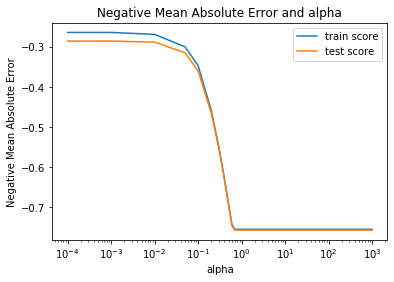

In [85]:
# plotting mean test and train scoes with alpha 
cv_results_lasso['param_alpha'] = cv_results_lasso['param_alpha'].astype('float32')

# plotting
plt.plot(cv_results_lasso['param_alpha'], cv_results_lasso['mean_train_score'])
plt.plot(cv_results_lasso['param_alpha'], cv_results_lasso['mean_test_score'])
plt.xlabel('alpha')
plt.xscale("log")
plt.ylabel('Negative Mean Absolute Error')

plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()

In [86]:
print("\n The best estimator across ALL searched params:\n",
          lasso_model_cv.best_estimator_)
print("\n The best score across ALL searched params:\n",
          lasso_model_cv.best_score_)
print("\n The best parameters across ALL searched params:\n",
          lasso_model_cv.best_params_)


 The best estimator across ALL searched params:
 Lasso(alpha=0.001, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

 The best score across ALL searched params:
 -0.2855406230747186

 The best parameters across ALL searched params:
 {'alpha': 0.001}


In [87]:
alpha_lasso =0.001

lasso = Lasso(alpha=alpha_lasso)
        
lasso.fit(X_train_lasso, y_train) 

Lasso(alpha=0.001, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [88]:
model_parameters = list(lasso.coef_)
# model coefficients
cols = X.columns
cols = cols.insert(0, "constant")
model_parameters = list(lasso.coef_)
lasso_list = list(zip(cols, model_parameters))

In [89]:
lm = Lasso(alpha=0.001)
lm.fit(X_train_lasso, y_train)

# predict
y_train_pred = lm.predict(X_train_lasso)
print('The training accuracy is:')
print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred))
y_test_pred = lm.predict(X_test_lasso)
print('The test accuracy is:')
print(metrics.r2_score(y_true=y_test, y_pred=y_test_pred))

The training accuracy is:
0.8550386401314213
The test accuracy is:
0.8008651247084628


In [90]:
#lasso_list
coefficients = pd.concat([pd.DataFrame(X_train_lasso.columns),pd.DataFrame(np.transpose(abs(lasso.coef_)))],ignore_index=True, axis = 1)
coefficients.columns = ['feature', 'importance']
sorted_df = coefficients.sort_values(by='importance',ascending=False)
sorted_df[0:10]

,feature,importance
3,TotalBsmtSF,0.271604
34,KitchenQual_TA,0.221858
16,OverallQual_5,0.185944
5,GrLivArea,0.168953
0,BsmtFinSF1,0.134122
15,OverallQual_4,0.129140
6,MSSubClass_60,0.121231
32,KitchenQual_Fa,0.114232
17,OverallQual_6,0.113202
14,OverallQual_3,0.097636


In [91]:
model_parameters = list(lasso.coef_)
# model coefficients
cols = X.columns
cols = cols.insert(0, "constant")
model_parameters = list(lasso.coef_)
lasso_list = list(zip(cols, model_parameters))

In [92]:
final_lasso_new_pred =[]
for i in range(len(lasso_list)):
    if(lasso_list[i][1]!=0):
        final_lasso_new_pred.append(lasso_list[i][0])
print('Number of predictors selected by double the optimal alpha for lasso are:{0}'.format(len(final_lasso_new_pred)))

Number of predictors selected by double the optimal alpha for lasso are:37


## So we got Test accuracy of 86% on Ridge Regression and 84% on Lasso Regression